In [1]:
import cv2
import numpy as np

In [13]:
# Load the image
img = cv2.imread('images/breadboard.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

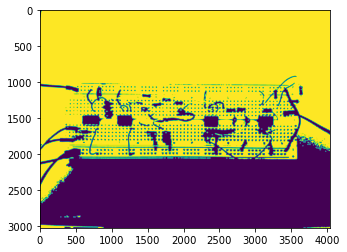

In [14]:
# Apply binary thresholding to create a mask
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply morphological operations to clean up the mask
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Show the original image with detected lines
# display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(sure_bg)
plt.show()

In [15]:
# save sure_bg to file
cv2.imwrite('images/sure_bg.png', sure_bg)

True

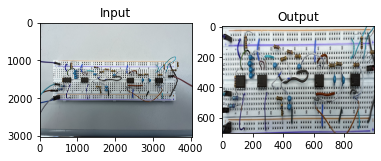

In [27]:
img = cv2.imread('images/breadboard.png')

rows,cols,ch = img.shape
pts1 = np.float32([[330,970],[3555,1010],[320,2030],[3565,2066]])
pts2 = np.float32([[0,0],[1000,0],[0,700],[1000,700]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(1000,700))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()



In [28]:
# save output to file
cv2.imwrite('images/output.png', dst)

True

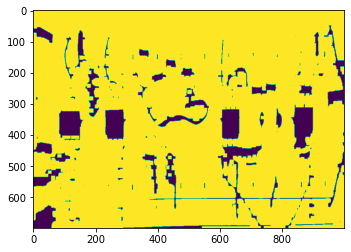

In [29]:
# Load the image
img = cv2.imread('images/output.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to create a mask
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply morphological operations to clean up the mask
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg_cropped = cv2.dilate(opening, kernel, iterations=3)

# Show the original image with detected lines
# display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(sure_bg_cropped)
plt.show()


In [30]:
# save sure_bg_cropped to file
cv2.imwrite('images/sure_bg_cropped.png', sure_bg_cropped)

True